# Kaggle Learn: Introduction to Deep Learning

In this notebook, we begin our study of **Deep Learning**. We will use **Tensorflow** and **Keras** to build and train **Neural Networks** (NN) for structured data.

Deep learning is an approach to machine learning characterized by many multi-layered (deep) stacks of computations. This depth of computation is what has enabled deep learning models to understand the complex patterns found in the most challenging real-world datasets.

Some of the most impressive advances in artificial intelligence in recent years have been in the field of deep learning. Natural language translation, image recognition, and game playing are all tasks where deep learning models have neared or even exceeded human-level performance.

## Table Of Contents

* **0.** [Dependancies and Settings](#0-Dependancies-and-Settings)  
* **1.** [Useful Links](#1-Useful-Links)  
* **2.** [A Single Neuron](#2-A-Single-Neuron)  
  * **2.1.** [Multiple Inputs](#2.1-Multiple-Inputs)  
  * **2.2.** [Linear Units in Keras](#2.2-Linear-Units-in-Keras)  
* **3.** [Deep Neural Networks](#3-Deep-Neural-Networks)  
  * **3.1.** [Activation Functions](#3.1-Activation-Functions)  
  * **3.2.** [Stacking layers](#3.2-Stacking-layers)  
  * **3.3.** [Defining a model](#3.3-Defining-a-model)  
* **4.** [Stochastic Gradient Descent](#4-Stochastic-Gradient-Descent)  
  * **4.1.** [Loss function](#4.1-Loss-function)  
  * **4.2.** [Optimizer](#4.2-Optimizer)  
  * **4.3.** [Training a model](#4.3-Training-a-model)  
* **5.** [Overfitting and Underfitting](#5-Overfitting-and-Underfitting)  
  * **5.1.** [](#5.1-)  

## 0 Dependancies and Settings

Installation:

In [1]:
# Installing or upgrading
# Note: might have to restart kernel

# Uncomment:
# import sys

# Installing:
# !{sys.executable} -m pip install scikit-learn
# Upgrading:
# !{sys.executable} -m pip install --upgrade scipy==1.9.0 --user

Imports:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('tensorflow version:', tf.__version__)

pandas version: 1.5.2
numpy version: 1.23.0
tensorflow version: 2.11.0


Set the plotting style:

In [4]:
try:
    scientific_style = [
        '../../Random/PythonTutorialsForDataScience/data/science.mplstyle', 
        '../../Random/PythonTutorialsForDataScience/data/notebook.mplstyle', 
        '../../Random/PythonTutorialsForDataScience/data/grid.mplstyle'
    ]

    plt.style.use(scientific_style)
    
    print('Using Scientific Style.')
except:
    print('Missing Scientific Style, continuing with default.')

Using Scientific Style.


Define the filepath where most of the data resides:

In [5]:
path = r'C:\Users\seani\Documents\JupyterNotebooks\Kaggle\KaggleLearn\Assets'

Function used to get names of files in a directory:

In [6]:
import os

def get_files(path):
    '''
    Inputs: a path string
    Returns: a list of names of files in a directory
    '''
    
    files = []
    # search through each item in the directory
    for file in os.listdir(path):
        # check it is a file
        if os.path.isfile(os.path.join(path, file)):
            files.append(file)
    
    return files

The seed used throughout for reproducable randomness:

In [7]:
seed = 1

## 1 Useful Links

- Tensorflow main page: https://www.tensorflow.org/  
- Tensorflow python API: https://www.tensorflow.org/api_docs/python/tf  
- Wiki activation functions: https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions
- Keras activation functions: https://keras.io/api/layers/activations/#available-activations
- Keras loss functions: https://keras.io/api/losses/regression_losses/

## 2 A Single Neuron

Through their power and scalability neural networks have become the defining model of deep learning. Neural networks are composed of neurons, where each neuron individually performs only a simple computation. The power of a neural network comes from the complexity of the connections these neurons can form together.

So let's begin with the fundamental component of a neural network: the individual neuron. As a diagram, a **neuron** (or **unit**) with *one input* looks like:

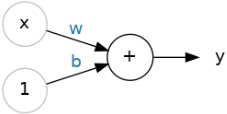

*Figure 1: A single neuron (the linear unit). $x$ is the input, multiplied by the weight $w$, while we have a bias weight $b$ which we multiply by an input with value $1$. The output $y$ is thus: $y = w x + b$.*

The input is $x$. Its connection to the neuron has a weight which is $w$. Whenever a value flows through a connection, you multiply the value by the connection's weight. For the input $x$, what reaches the neuron is $w x$. A neural network "learns" by modifying its weights.

The $b$ is a special kind of weight we call the bias. The bias doesn't have any input data associated with it; instead, we put a $1$ in the diagram so that the value that reaches the neuron is just $b$ (since $1 \times b = b$). The bias enables the neuron to modify the output independently of its inputs.

The $y$ is the value the neuron ultimately outputs. To get the output, the neuron sums up all the values it receives through its connections. This neuron's activation is `y = w * x + b`, or as a formula $y = w x + b$. Notice this is the formula of a line, hence the name *linear unit*.

### 2.1 Multiple Inputs

We can expand this linear unit to include multiple inputs (but remember we have only one bias). We treat each new input the same, each having their own corresponding weight:

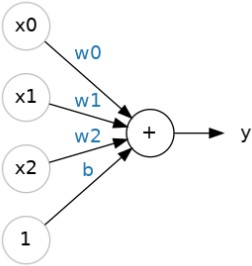

*Figure 2: A single neuron with multiple inputs. Each input has a corresponding weight. The output $y$ is thus: $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$.*

As we can see, the formula for this neuron is now: $y = w_0 x_0 + w_1 x_1 + w_2 x_2 + b$. If the set of weights are $\bar{w}$, and the set of inputs $\bar{x}$, we can denote the output using a dot-product: $y = \bar{w} \cdot \bar{x} + b$ (*some sources include the bias in the set of weights, with a corresponding input of $1$*).

A linear unit with two inputs will fit a plane, and a unit with more inputs than that will fit a hyperplane.

### 2.2 Linear Units in Keras

We want to see how we can implement this Linear Unit as a model. Let's work on an example, the [*Red Wine Quality*](https://archive.ics.uci.edu/ml/datasets/wine+quality) dataset consists of physiochemical measurements (features) from about $1600$ Portuguese red wines. Also included is a quality rating (target) for each wine from blind taste-tests. We import the data as follows:

In [8]:
# import the data as pandas DataFrame
red_wine = pd.read_csv('Assets/redwine_data.csv')

# get the shape
print(f'Shape of dataset: {red_wine.shape}')

red_wine

Shape of dataset: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The easiest way to create a model in Keras is through ``keras.Sequential``, which creates a neural network as a stack of *layers*. We can create models like those above using a *dense* layer (which we'll learn more about in the next section). With the first argument, ``units``, we define how many outputs we want. With the second argument, ``input_shape``, we tell Keras the dimensions of the inputs.

We want to predict a wine's perceived quality from the physiochemical measurements, these are our features, and there are $11$ of them (`input_shape`). We want the output to be the quality, so we have one output (`units`). The model is created as follows:

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# linear model so only one unit
# all features total to 11 inputs
model = keras.Sequential([
    layers.Dense(units=1, input_shape=[11]),
])
model

Internally, Keras represents the weights of a neural network with **tensors**. Tensors are basically TensorFlow's version of a Numpy array with a few differences that make them better suited to deep learning. One of the most important is that tensors are compatible with GPU and TPU accelerators. TPUs, in fact, are designed specifically for tensor computations.

A model's weights and biases are kept in its ``weights`` attribute as a list of tensors (``[weights, biases]``). Notice though that there doesn't seem to be any pattern to the values the weights have. Before the model is trained, the weights are set to random numbers (and the bias to `0.0`). A neural network learns by finding better values for its weights.

In [10]:
# weights and biases are contained together
w, b = model.weights

print(f'Weights:\n{w}')
print(f'Bias:\n{b}')

Weights:
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.13238883],
       [-0.02893227],
       [-0.46460578],
       [ 0.12616622],
       [-0.47507674],
       [-0.52367777],
       [ 0.1512332 ],
       [-0.13900638],
       [-0.530269  ],
       [-0.6520871 ],
       [-0.27983737]], dtype=float32)>
Bias:
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


(By the way, Keras represents weights as tensors, but also uses tensors to represent data.)

## 3 Deep Neural Networks

In this section we're going to see how we can build NNs capable of learning the complex relationships deep NNs are famous for. The key idea here is modularity, building up a complex network from simpler functional units. We've seen how a linear unit computes a linear function, now we'll see how to combine and modify these single units to model more complex relationships.

Neural networks typically organize their neurons into **layers**. When we collect together linear units having a common set of inputs we get a **dense** layer. When these are created between the input and output layers they are often called **hidden** layers:

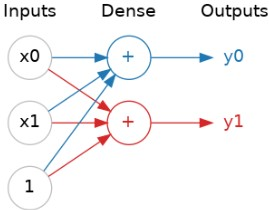

*Figure 3: A dense (hidden) layer of two neurons receiving two inputs and a bias.*

You could think of each layer in a neural network as performing some kind of relatively simple transformation. A `layer` in Keras is a very general kind of thing. A layer can be, essentially, any kind of data transformation. [There are many types of layers that can be used.](https://www.tensorflow.org/api_docs/python/tf/keras/layers)

### 3.1 Activation Functions

It turns out, however, that two dense layers with nothing in between are no better than a single dense layer by itself. Dense layers by themselves can never move us out of the world of lines and planes. What we need is something *non-linear*. What we need are **activation functions**. This is simply some function we apply to each of a layer's outputs (its *activations*).

There are many kinds of [activation functions](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), but the most common is the rectifier function $max(0, x)$. The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines. When we attach the rectifier to a linear unit, we get a **rectified linear unit** or **ReLU**. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes `max(0, w * x + b)`.

Other functions include the **sigmoid**, **tanh**, **softmax**, etc. They can be called by using [keras.layers.Activation('str')](https://keras.io/api/layers/activations/#available-activations), or directly in the Dense layer. Let's look at some supplied by Keras:

Text(0, 0.5, 'Output')

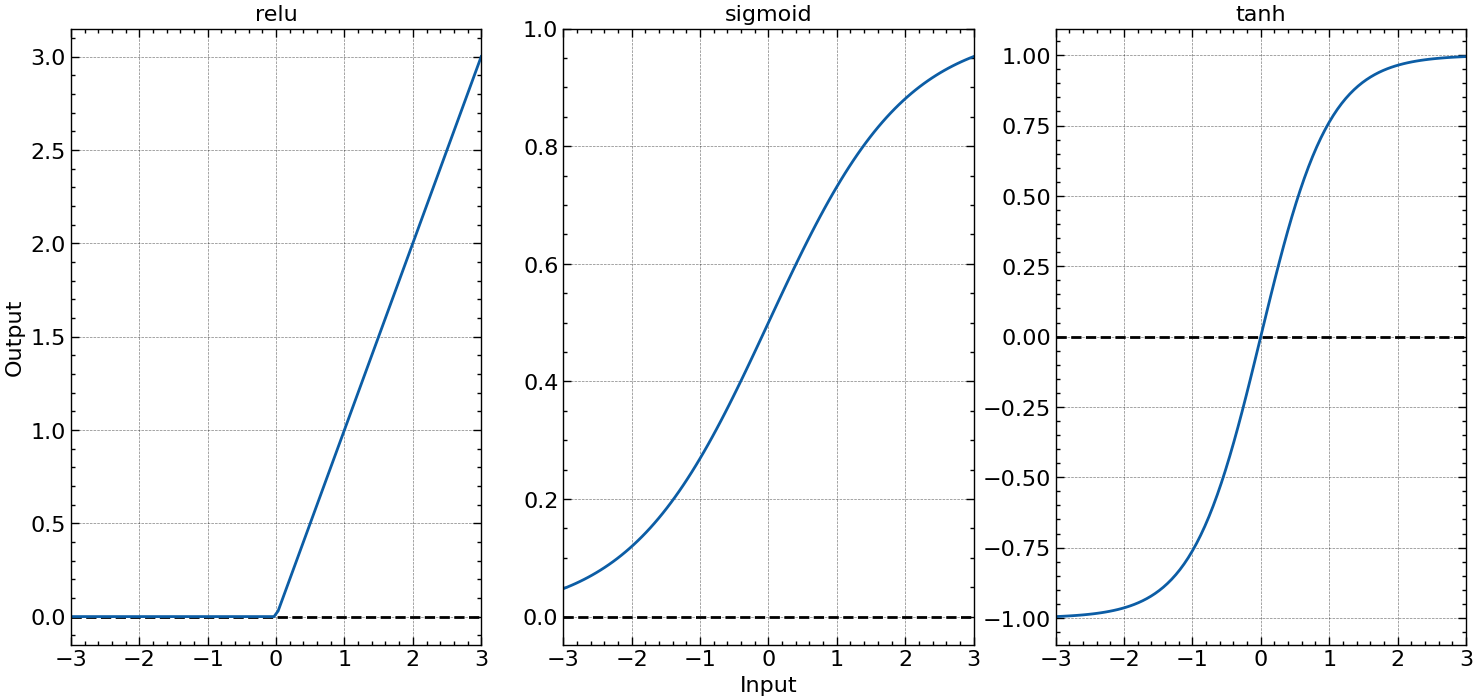

In [11]:
fig, axes = plt.subplots(
    1,
    3,
    figsize=(18, 8),
)

# the activation functions looked at
activation_functions = ['relu', 'sigmoid', 'tanh']

# the inputs used
x = tf.linspace(-3.0, 3.0, 100)

# loop through each activation function
for i, function in enumerate(activation_functions):
    # get the activation layer with the current activation function
    activation_layer = layers.Activation(function)
    y = activation_layer(x)  # once created, a layer is callable just like a function
    
    # horizontal line at zero
    axes[i].axhline(0, color='k', ls='--')
    # plot output of function
    axes[i].plot(
        x,
        y,
    )

    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)

    axes[i].set_xlim(-3, 3)
    axes[i].set_ylim(None)

    axes[i].set_title(f'{function}')

axes[1].set_xlabel('Input')
axes[0].set_ylabel('Output')

### 3.2 Stacking layers

An example of a stack of dense layers is as follows:

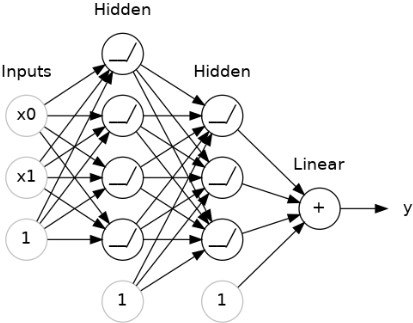

*Figure 4: A stack of dense layers to create a NN. The hidden layers contain ReLU activation functions (denoted by the symbol). This results in a linear unit output, without an activation function (see symbol).*

Now, notice that the output layer is a linear unit (meaning, no activation function). That makes this network appropriate to a regression task, where we are trying to predict some arbitrary numeric value. Other tasks (like classification) might require an activation function on the output.

### 3.3 Defining a model

Previously, we created a simple linear unit model for the Red Wine dataset. Now let's create a model with three hidden layers, each having 512 units and the ReLU activation:

In [12]:
# creating model
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # output layer (linear unit)
    layers.Dense(units=1),
])
model

Note that we could have instead created the dense layers seperate to the activation functions, using activation layers. This isn't particularly useful now, but can be for other applications (see section on Batch Normalisation). The above cell can be recreated as follows:

In [13]:
# creating model
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=512, input_shape=[1]),
    layers.Activation('relu'),  # activation acts on the above dense layer
    layers.Dense(units=512),
    layers.Activation('relu'),
    layers.Dense(units=512),
    layers.Activation('relu'),
    # output layer (linear unit)
    layers.Dense(units=1),
])
model

## 4 Stochastic Gradient Descent

In the first two sections, we learned how to build fully-connected networks out of stacks of dense layers. When first created, all of the network's weights are set randomly - the network doesn't "know" anything yet. In this lesson we're going to see how to train a neural network; we're going to see how neural networks *learn*.

As with all machine learning tasks, we begin with a set of training data. Each example in the training data consists of some features (the inputs) together with an expected target (the output). Training the network means adjusting its weights in such a way that it can transform the features into the target. In addition to the training data, we need two more things:

- A "loss function" that measures how good the network's predictions are.
- An "optimizer" that can tell the network how to change its weights.

### 4.1 Loss function

The **loss function** measures the disparity between the the target's true value and the value the model predicts. During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better).

Different problems call for different loss functions. We have been looking at *regression* problems, where the task is to predict some numerical value, like the quality in the Red Wine dataset. Other regression tasks might be for example predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the **mean absolute error** or **MAE**. Besides MAE, [other loss functions](https://keras.io/api/losses/regression_losses/) you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

### 4.2 Optimizer

The **optimizer** is an algorithm that adjusts the weights to minimize the loss. Virtually all of the optimization algorithms used in deep learning belong to a family called **stochastic gradient descent**. They are iterative algorithms that train a network in steps. One step of training goes like this:

1. Sample some training data and run it through the network to make predictions.
2. Measure the loss between the predictions and the true values.
3. Finally, adjust the weights in a direction that makes the loss smaller.

Then just do this over and over until the loss is as small as you like (or until it won't decrease any further). Each iteration's sample of training data is called a **minibatch** (or often just **batch**), while a complete round of the training data is called an **epoch**. The number of epochs you train for is how many times the network will see each training example.

The gif below shows the linear model from the first section being trained with SGD:

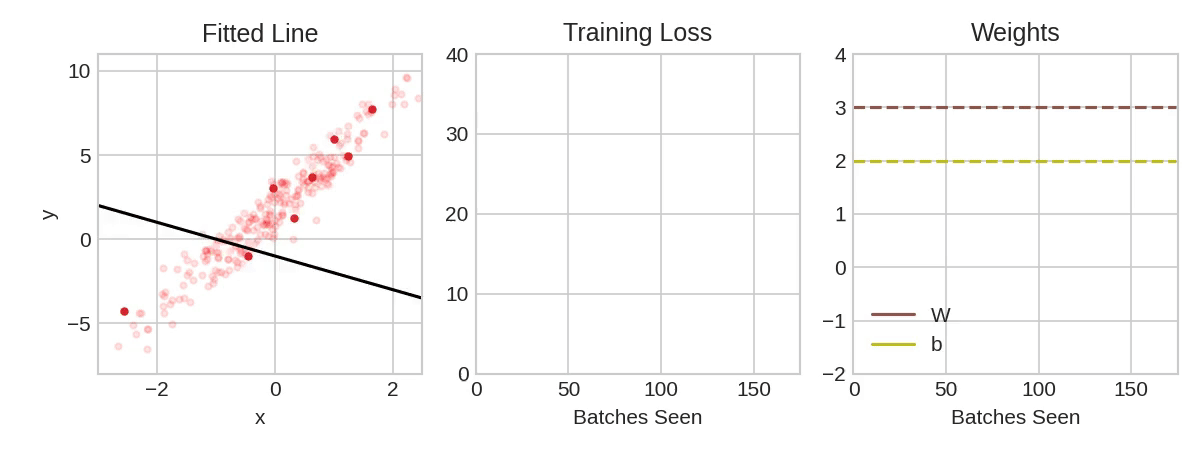

The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (`w` the slope and `b` the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the **learning rate**. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values. The size of the minibatches has a similar affect.

Smaller batch sizes give noisier weight updates and loss curves. This is because each batch is a small sample of data and smaller samples tend to give noisier estimates. Smaller batches can have an "averaging" effect though which can be beneficial. 
Smaller learning rates make the updates smaller and the training takes longer to converge. Large learning rates can speed up training, but don't "settle in" to a minimum as well. When the learning rate is too large, the training can fail completely.

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. **Adam** is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). [Adam](https://keras.io/api/optimizers/adam/) is a great general-purpose optimizer.

*The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD.*

### 4.3 Training a model

Let's train a NN on the red-wine dataset. The data is reimported below, with some preprocessing (using pandas instead of sci-kit learn). Note also we have rescaled each feature to lie in the interval $[0, 1]$. As we'll discuss more in section 6, neural networks tend to perform best when their inputs are on a common scale.

In [14]:
# Create training and validation splits
X_train = red_wine.sample(frac=0.7, random_state=0)
X_valid = red_wine.drop(X_train.index)  # removes all rows with indices belonging to X_train

# Scale to [0, 1]
train_max = X_train.max(axis=0)
train_min = X_train.min(axis=0)
X_train = (X_train - train_min) / (train_max - train_min)

valid_max = X_valid.max(axis=0)
valid_min = X_valid.min(axis=0)
X_valid = (X_valid - valid_min) / (valid_max - valid_min)

# Split features and target
y_train = X_train['quality']
y_valid = X_valid['quality']

X_train = X_train.drop('quality', axis=1)
X_valid = X_valid.drop('quality', axis=1)

X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,0.548673,0.239726,0.544304,0.092308,0.237435,0.366197,0.212014,0.619193,0.291262,0.260606,0.369231
1032,0.309735,0.479452,0.000000,0.246154,0.105719,0.056338,0.028269,0.645088,0.475728,0.121212,0.184615
1002,0.398230,0.116438,0.417722,0.088462,0.050260,0.169014,0.074205,0.387662,0.378641,0.309091,0.507692
487,0.495575,0.359589,0.455696,0.069231,0.032929,0.056338,0.028269,0.619193,0.291262,0.054545,0.246154
979,0.672566,0.226027,0.620253,0.038462,0.071057,0.028169,0.000000,0.520183,0.252427,0.181818,0.307692
...,...,...,...,...,...,...,...,...,...,...,...
640,0.469027,0.287671,0.569620,0.107692,0.064125,0.211268,0.120141,0.687738,0.504854,0.175758,0.153846
104,0.230088,0.253425,0.303797,0.100000,0.062392,0.056338,0.106007,0.451637,0.446602,0.090909,0.153846
815,0.548673,0.226027,0.417722,0.123077,0.112652,0.267606,0.113074,0.617669,0.359223,0.230303,0.369231
998,0.380531,0.493151,0.430380,0.038462,0.027730,0.042254,0.014134,0.416603,0.242718,0.090909,0.107692


We then create a model with three hidden layers of $512$ neurons each:

*Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide.*

In [15]:
# create the model
model = keras.Sequential([
    # hidden layers
    layers.Dense(units=512, activation='relu', input_shape=[11]),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=512, activation='relu'),
    # output layer
    layers.Dense(units=1),
])

After defining the model, we compile in the optimizer and loss function:

In [16]:
# compile the optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

Now we're ready to start the training. We tell Keras to feed the optimizer $256$ rows of the training data at a time (the `batch_size`) and to do that $10$ times all the way through the dataset (the `epochs`):

*Keras keeps us updated on the loss as the model trains.*

In [17]:
# train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 53ms/step - loss: 0.2574 - val_loss: 0.1445
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1598 - val_loss: 0.1317
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1383 - val_loss: 0.1240
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1233 - val_loss: 0.1160
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1154 - val_loss: 0.1073
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1129 - val_loss: 0.1052
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.1096 - val_loss: 0.1025
Epoch 8/10
5/5 [==============================] - 0s 24ms/step - loss: 0.1053 - val_loss: 0.1022
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1035 - val_loss: 0.1001
Epoch 10/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1031 - val_loss: 0.1119


Often, a better way to view the loss though is to plot it. The `fit` method keeps a record of the loss produced during training in a `History` object. We'll convert the data to a dataframe, which makes the plotting easy:

<AxesSubplot:>

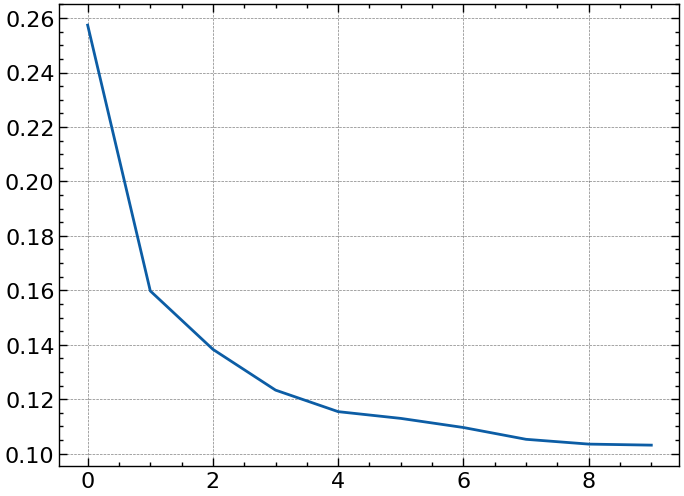

In [18]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
history_df['loss'].plot()

Loss is on the y-axis, while epoch is on the x-axis.

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.

## 5 Overfitting and Underfitting